El siguiente scrip presenta un análisis estadístico realizado sobre el flujo vehicular sobre un tipo de carro con caracterísiticas específicas cerca a la avenida regional en la ciudad de Medellín. El análisis se realiza a partir de los siguientes pasos:

1. Toma de datos: escoja una calle donde la afluencia de objetos (dígase carros o personas) no sea muy alta, en particular, algún sitio donde no haya semáforos cerca. Realice un conteo de objetos en intervalos de un minuto. Realice el conteo durante una hora.
2. A partir del conjunto de datos obtenga el número medio de resultados.

In [1]:
import numpy as np
from scipy import stats
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [2]:
import numpy as np

# Conjunto de datos: número de carros rojos observados en intervalos de un minuto durante una hora
rojos = np.array([3, 3, 4, 2, 3, 0, 1, 3, 0, 5, 0, 1, 4, 4, 0, 1, 3, 0, 2, 3, 2, 3, 2, 4, 0, 2, 3, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 3, 1, 3, 1, 3, 4, 0, 0, 3, 1, 1, 1, 1, 1, 5, 2, 1, 2, 2, 2, 4, 3, 0])

# Cálculo del promedio del número de carros rojos
media1 = np.mean(rojos)

# Impresión del promedio de carros rojos
print('Promedio de carros rojos:', media1)

# Distribución de frecuencia de los datos recopilados (para representación gráfica en un histograma)
distribucionr = np.array([[0., 1., 2., 3., 4., 5.],
                          [10., 15., 14., 13., 6., 2.]])


Promedio de carros rojos: 1.9333333333333333


3. Con el valor del número medio de resultados, cree un conjunto de datos simulados que sigan una distribución de Poisson (ayuda: se recomienda usar scipy.stats.poisson).

[3 3 0 2 5 1 0 2 2 5 2 3 3 0 3 1 3 4 2 3 2 1 1 1 1 3 2 3 3 1 6 3 2 0 2 0 2
 1 2 2 1 1 0 1 1 2 3 1 2 1 1 0 1 1 3 3 4 2 1 2]
1.9333333333333333


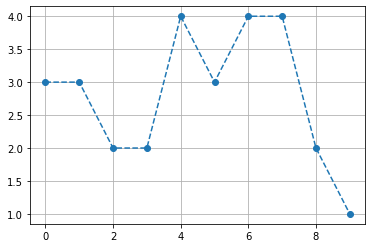

In [ ]:
# Número medio de resultados obtenidos previamente
mu = media1  # Se utiliza el número medio de carros rojos calculado anteriormente

# Generación de datos simulados que siguen una distribución de Poisson
r = poisson.rvs(mu, size=60)  # Se generan 60 datos simulados
prom = np.mean(r)  # Se calcula el promedio de los datos simulados
print(r)  # Se imprime el conjunto de datos simulados
print(prom)  # Se imprime el promedio de los datos simulados

# Creación de un histograma para visualizar los datos simulados
plt.plot(r, 'o--')  # Se grafican los datos simulados
plt.grid()  

# Distribución de frecuencia para la representación gráfica en el histograma
distribuciona = np.array([[0., 1., 2., 3., 4., 5., 6., 7.],
                          [10., 18., 14., 11., 2., 3., 1., 1.]])


In [ ]:
#VERIFICANDO EL PROMEDIO DE LOS DATOS ALEATORIOS
random =  "1 2 0 1 2 3 5 2 3 3 3 1 0 3 2 1 0 2 2 1 1 2 7 1 0 3 2 1 1 3 2 1 4 1 2 4 3 3 0 2 0 1 0 1 4 1 0 5 0 1 1 3 2 6 2 3 0 1 2 1 "
l1=random.split()
nl1=[float(i) for i in l1] # CONVIRTIENDO A LISTA
print(nl1)
media = np.mean(nl1)
print(media)


[1.0, 2.0, 0.0, 1.0, 2.0, 3.0, 5.0, 2.0, 3.0, 3.0, 3.0, 1.0, 0.0, 3.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 1.0, 2.0, 7.0, 1.0, 0.0, 3.0, 2.0, 1.0, 1.0, 3.0, 2.0, 1.0, 4.0, 1.0, 2.0, 4.0, 3.0, 3.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 4.0, 1.0, 0.0, 5.0, 0.0, 1.0, 1.0, 3.0, 2.0, 6.0, 2.0, 3.0, 0.0, 1.0, 2.0, 1.0]
1.9


4. Grafique los datos reales y los datos simulados conjuntamente. ¿Qué diferencias o similitudes encuentra entre los datos experimentales y simulados?

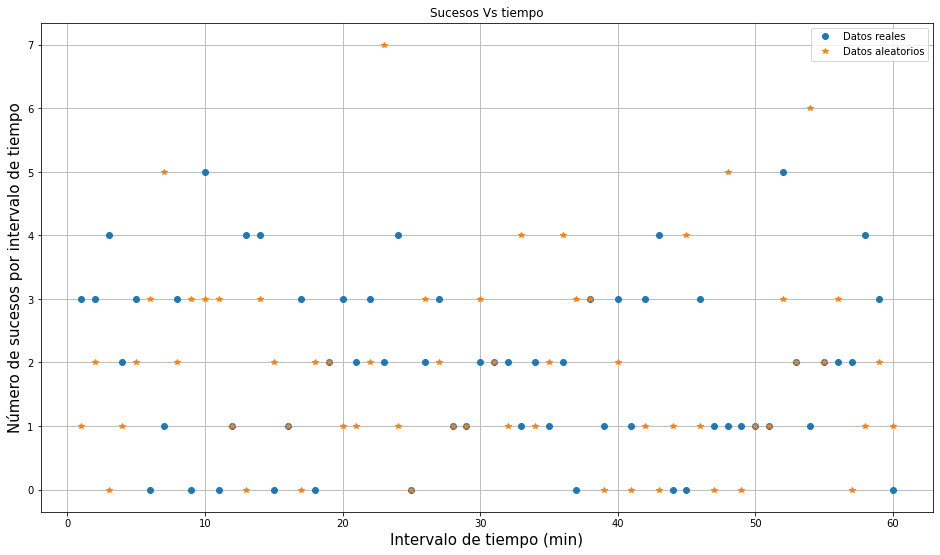

In [ ]:
#DATOS REALES
dt = np.arange(1,61)
plt.figure(figsize=(16,9))
plt.plot(dt,rojos,'o',label = 'Datos reales')
plt.plot(dt,nl1,'*',label = 'Datos aleatorios')
plt.title('Sucesos Vs tiempo')
plt.xlabel('Intervalo de tiempo (min)',fontsize=15)
plt.ylabel('Número de sucesos por intervalo de tiempo', fontsize=15)
plt.legend()
plt.grid()

A partir de la grágica podemos observar que los conjuntos de datos no obedecen un patrón, pues son aleatorios; sin embargo, tienen la misma media. Nos encontramos también que algunos de ellos coiciden para un tiempo determinado.

5. Realice un gráfico de los residuos de ambos conjuntos de datos y grafique conjuntamente, ¿puede decir que los datos están distribuidos aleatoriamente?.

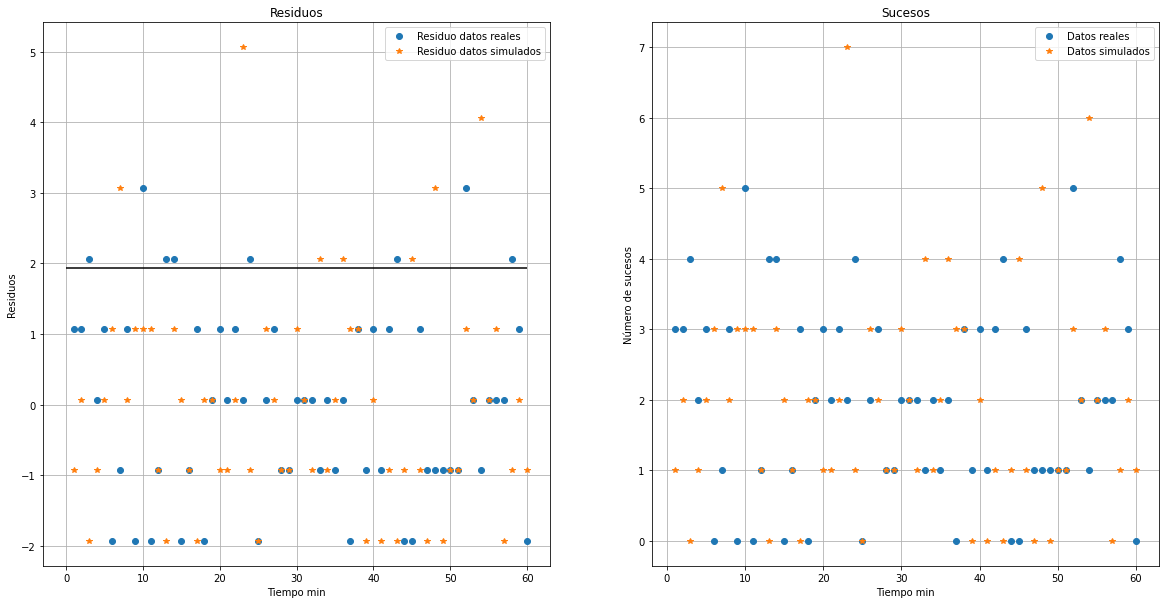

In [ ]:
# Cálculo de los residuos para ambos conjuntos de datos
rreal = (rojos - media1)  # Residuos de los datos reales
rale = (nl1 - media1)     # Residuos de los datos simulados

# Creación de una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico de los residuos
ax1.set_title('Residuos')  # Título del primer subgráfico
ax1.plot(dt, rreal, 'o', label='Residuo datos reales')   # Gráfico de los residuos de los datos reales
ax1.plot(dt, rale, '*', label='Residuo datos simulados')  # Gráfico de los residuos de los datos simulados
ax1.set_xlabel('Tiempo min')  # Etiqueta del eje x
ax1.set_ylabel('Residuos')     # Etiqueta del eje y
ax1.hlines(media1, 0, 60)      # Línea horizontal en el valor medio de los residuos
ax1.legend()                   # Mostrar leyenda
ax1.grid()                     # Agregar rejilla al gráfico

# Gráfico de los datos originales
ax2.set_title('Sucesos')       # Título del segundo subgráfico
ax2.plot(dt, rojos, 'o', label='Datos reales')     # Gráfico de los datos reales
ax2.plot(dt, nl1, '*', label='Datos simulados')   # Gráfico de los datos simulados
ax2.set_xlabel('Tiempo min')   # Etiqueta del eje x
ax2.set_ylabel('Número de sucesos')  # Etiqueta del eje y
ax2.legend()                   
ax2.grid()                     
# Mostrar la figura
plt.show()


Al comparar la gráfica de los datos con los residuos nos damos cuenta que tienden a reorganizarse por debajo del valor promedio obtenido. Sin embargo, el conjunto de datos tanto reales como simulados parecen seguir teniendo una distribución aleatoria por debajo del valor medio.

6. Graficar los histogramas de cada conjunto de datos y superponga la distribución teórica. Analizar y concluir sobre los resultados obtenidos.

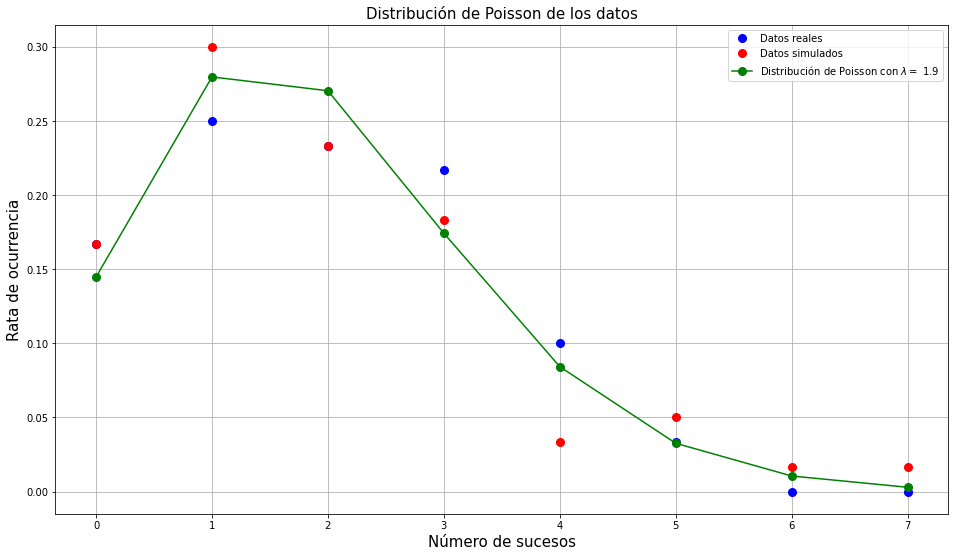

In [ ]:
# Rango de datos para el histograma
x = np.arange(0, 8)

# Función de probabilidad de Poisson para el número medio de resultados obtenidos previamente
histP = stats.poisson.pmf(x, media1)

# Distribuciones de frecuencia para los datos reales y simulados
distribucionr = np.array([[0., 1., 2., 3., 4., 5., 6., 7.], [10., 15., 14., 13., 6., 2., 0., 0.]])  # Datos reales
distribuciona = np.array([[0., 1., 2., 3., 4., 5., 6., 7.], [10., 18., 14., 11., 2., 3., 1., 1.]])    # Datos simulados

# Crear la figura y definir el tamaño
plt.figure(figsize=(16, 9))

# Graficar los datos reales y simulados
plt.plot(x, distribucionr[1, :] / 60, 'bo', ms=8, label='Datos reales')       # Datos reales
plt.plot(x, distribuciona[1, :] / 60, 'ro', ms=8, label='Datos simulados')   # Datos simulados

# Graficar la distribución de Poisson
plt.plot(x, histP, '-go', ms=8, label='Distribución de Poisson con $\lambda=$ %.1f' % media1)

# Añadir títulos y etiquetas a los ejes
plt.title('Distribución de Poisson de los datos', fontsize=15)
plt.xlabel('Número de sucesos', fontsize=15)
plt.ylabel('Rata de ocurrencia', fontsize=15)

# Mostrar la leyenda
plt.legend()

# Agregar una rejilla al gráfico
plt.grid()

# Mostrar el gráfico
plt.show()


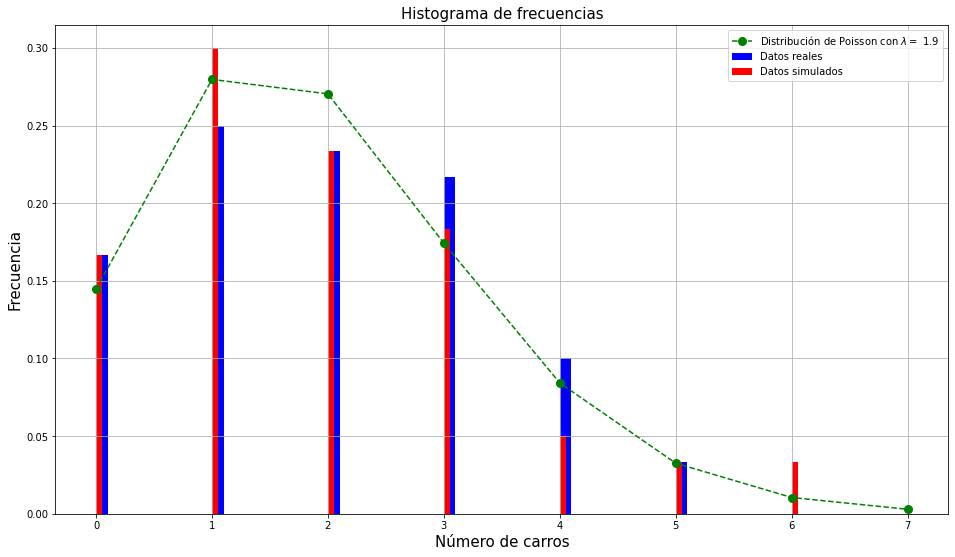

In [ ]:
plt.figure(figsize=(16,9))
media1= 1.9333333333333333
x = np.arange(0,8) # rango de datos
histP = stats.poisson.pmf(x, media1) # función de probabilidad de Poisson
rojos = np.array([3,3,4,2,3,0,1,3,0,5,0,1,4,4,0,1,3,0,2,3,2,3,2,4,0,2,3,1,1,2,2,2,1,2,1,2,0,3,1,3,1,3,4,0,0,3,1,1,1,1,1,5,2,1,2,2,2,4,3,0])
plt.hist(rojos, bins = [0,1,2,3,4,5,6,7],width=0.1, color = 'blue', label = 'Datos reales',density =True)
simu = np.array(nl1)
plt.hist(simu, bins = [0,1,2,3,4,5,6,7],width=0.05, color = 'red', label = 'Datos simulados',density =True)
plt.plot(x, histP, 'go--', ms=8, label='Distribución de Poisson con $\lambda=$ %.1f' % media1)
plt.title("Histograma de frecuencias", fontsize = 15)
plt.xlabel('Número de carros',fontsize = 15)
plt.ylabel('Frecuencia',fontsize = 15)
plt.grid()
plt.legend()
plt.show()

OBSERVACIONES Y CONCLUSIONES

- Podemos observar que tanto los datos simulados como los reales siguen una distribución de Poisson; pues la media de los datos son parecidas.

- Sin embargo, podemos notar diferencia entre la distribución teórica de Poisson con ellas a pesar de que se le haya asignado la misma media.

- Podemos observar efectivamente que el pico de la distribución tiende a
  con el valor de la media.

7. Calcule la probabilidad para los datos experimentales y simulados de que pasen entre 2 y 5   de los objetos por la calle que escogió en el intervalo de un minuto. ¿Cuántos esperaría ver pasar en 10 minutos?

In [ ]:
x = np.arange(0,8) # rango de datos
histP = stats.poisson.pmf(x, media1) # función de probabilidad de Poisson
#x = np.arange(0,8) # rango de datos
histP1 = stats.poisson.pmf(x, media) # función de probabilidad de Poisson
num1 = 2 
num2 = 5
ProbP = (np.sum(histP[num1:int(num2)+1]))*100 # Probabilidad acumulada
ProbP1 = (np.sum(histP1[num1:int(num2)+1]))*100 # Probabilidad acumulada
print('Probabilidad en datos experimentales',np.round(ProbP,2),'%')
print('Probabilidad en datos experimentales',np.round(ProbP1,2),'%')

Probabilidad en datos experimentales 56.14 %
Probabilidad en datos experimentales 55.3 %


Para un minuto se tiene un valor promedio de sucesos de aproximadamente 1.93 carros rojos; por lo tanto , para 10 minutos se esperaría

In [ ]:
 s = 10*media1
 print('Se esperarían ver pasar aproximadamente',round(s,2),'carros')

Se esperarían ver pasar aproximadamente 19.33 carros
